# Error Rates

## 1. Measure Error Rate in matching Record Pair

### 1.1  Error = Number of unequal attributes

In [1]:
import pandas as pd

In [2]:
# get the data
filepath = "data/2021_NCVR_Panse_001/dataset_ncvr_dirty.csv"
col_names = "sourceID,globalID,localID,FIRSTNAME,MIDDLENAME,LASTNAME,YEAROFBIRTH,PLACEOFBIRTH,COUNTRY,CITY,PLZ,STREET,GENDER,ETHNIC,RACE".split(",")
df = pd.read_csv(filepath, names=col_names, dtype={"PLZ": str, "YEAROFBIRTH": int},
                              keep_default_na=False)
df.shape[0]

200000

In [3]:
# split dataset
df1 = df[df.sourceID == "A"]
df2 = df[df.sourceID == "B"]

In [6]:
# get all matching record pairs
matches1 = df1[df1.globalID.isin(df2.globalID)]
matches2 = df2[df2.globalID.isin(df1.globalID)]
pairs = matches1.merge(matches2, on="globalID", suffixes=["_a", "_b"])
pairs.head()

,sourceID_a,globalID,localID_a,FIRSTNAME_a,MIDDLENAME_a,LASTNAME_a,YEAROFBIRTH_a,PLACEOFBIRTH_a,COUNTRY_a,CITY_a,...,LASTNAME_b,YEAROFBIRTH_b,PLACEOFBIRTH_b,COUNTRY_b,CITY_b,PLZ_b,STREET_b,GENDER_b,ETHNIC_b,RACE_b
0,A,AL82294,202338d686d641a11c6bae62644bd51e,LISA,F,BALDWIN,1966,,BUNCOMBE,BLACK MOUNTAIN,...,BALDWIN,1966,,BUNCOMBE,BLACK MOUNTAIN,28711,GENESIS,F,NL,W
1,A,BL352807,18471fd8e38e1ab6bd8d1545c368faa3,AHRMAD,RASHAD,GRIFFIN,1976,,DURHAM,DURHAM,...,GRIFFIN,1976,MO,DURHAM,DURHAM,27703,HOLLOWAY,M,UN,B
2,A,EA43706,180c3dfaab0583c4b23f137d48ab68ba,WHITNEY,MARIE,RAMER,1990,NC,STOKES,WALNUT COVE,...,CZERKIEWICZ,1990,NC,STOKES,WALNUT COVE,27052,PINK SMITH,F,NL,W
3,A,DT90164,58184c1d0360abfee773cc12a6ea76d4,WILLIAM,MARK,KING,1966,,ROWAN,SALISBURY,...,KING,1966,NC,ROWAN,SALISBURY,28147,GODBEY,M,NL,W
4,A,EH460595,eca1f5379f5282c6a63ee6adcacdacf2,MICHAEL,J,MARCHI,1963,CA,WAKE,WAKE FOREST,...,MARCHI,1963,CA,WAKE,WAKE FOREST,27587,OATLANDS,M,UN,W


In [11]:
attrs = col_names[3:]
def count_errors(row):
    errors = 0
    for attr in attrs:
        if row[attr + "_a"] != row[attr + "_b"]:
            errors += 1
    return errors

pairs["errors"] = pairs.apply(count_errors, axis=1)
pairs.head()

,sourceID_a,globalID,localID_a,FIRSTNAME_a,MIDDLENAME_a,LASTNAME_a,YEAROFBIRTH_a,PLACEOFBIRTH_a,COUNTRY_a,CITY_a,...,YEAROFBIRTH_b,PLACEOFBIRTH_b,COUNTRY_b,CITY_b,PLZ_b,STREET_b,GENDER_b,ETHNIC_b,RACE_b,errors
0,A,AL82294,202338d686d641a11c6bae62644bd51e,LISA,F,BALDWIN,1966,,BUNCOMBE,BLACK MOUNTAIN,...,1966,,BUNCOMBE,BLACK MOUNTAIN,28711,GENESIS,F,NL,W,1
1,A,BL352807,18471fd8e38e1ab6bd8d1545c368faa3,AHRMAD,RASHAD,GRIFFIN,1976,,DURHAM,DURHAM,...,1976,MO,DURHAM,DURHAM,27703,HOLLOWAY,M,UN,B,1
2,A,EA43706,180c3dfaab0583c4b23f137d48ab68ba,WHITNEY,MARIE,RAMER,1990,NC,STOKES,WALNUT COVE,...,1990,NC,STOKES,WALNUT COVE,27052,PINK SMITH,F,NL,W,1
3,A,DT90164,58184c1d0360abfee773cc12a6ea76d4,WILLIAM,MARK,KING,1966,,ROWAN,SALISBURY,...,1966,NC,ROWAN,SALISBURY,28147,GODBEY,M,NL,W,1
4,A,EH460595,eca1f5379f5282c6a63ee6adcacdacf2,MICHAEL,J,MARCHI,1963,CA,WAKE,WAKE FOREST,...,1963,CA,WAKE,WAKE FOREST,27587,OATLANDS,M,UN,W,3


In [24]:
pairs = pairs.reindex(sorted(pairs.columns), axis=1)
pairs.head()

,CITY_a,CITY_b,COUNTRY_a,COUNTRY_b,ETHNIC_a,ETHNIC_b,FIRSTNAME_a,FIRSTNAME_b,GENDER_a,GENDER_b,...,STREET_a,STREET_b,YEAROFBIRTH_a,YEAROFBIRTH_b,errors,globalID,localID_a,localID_b,sourceID_a,sourceID_b
0,BLACK MOUNTAIN,BLACK MOUNTAIN,BUNCOMBE,BUNCOMBE,NL,NL,LISA,LISA,F,F,...,GENESIS,GENESIS,1966,1966,1,AL82294,202338d686d641a11c6bae62644bd51e,b720a6610899bd6298aaaf2b0940e936,A,B
1,DURHAM,DURHAM,DURHAM,DURHAM,UN,UN,AHRMAD,AHRMAD,M,M,...,HOLLOWAY,HOLLOWAY,1976,1976,1,BL352807,18471fd8e38e1ab6bd8d1545c368faa3,208582e62d9b97bf8911bd776181d5f7,A,B
2,WALNUT COVE,WALNUT COVE,STOKES,STOKES,NL,NL,WHITNEY,WHITNEY,F,F,...,PINK SMITH,PINK SMITH,1990,1990,1,EA43706,180c3dfaab0583c4b23f137d48ab68ba,53f6d479a1a4f5e8df5cf1147718dd5c,A,B
3,SALISBURY,SALISBURY,ROWAN,ROWAN,NL,NL,WILLIAM,WILLIAM,M,M,...,GODBEY,GODBEY,1966,1966,1,DT90164,58184c1d0360abfee773cc12a6ea76d4,41de22873aaae321f51956c8dbc96d77,A,B
4,WAKE FOREST,WAKE FOREST,WAKE,WAKE,NL,UN,MICHAEL,MICHAEL,M,M,...,WAKEFALLS,OATLANDS,1963,1963,3,EH460595,eca1f5379f5282c6a63ee6adcacdacf2,bcd5badb125fe45724857a1130ca006b,A,B


<AxesSubplot:>

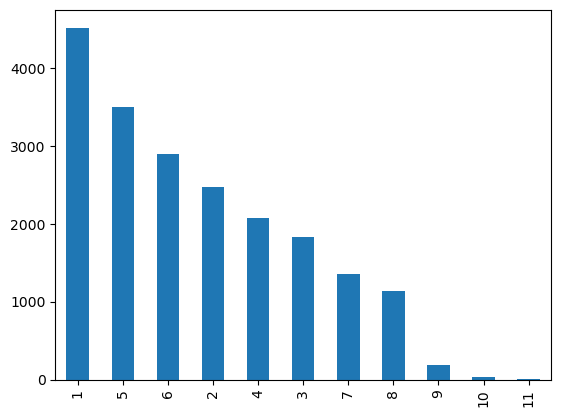

In [25]:
pairs.errors.value_counts().sort_values(ascending=False).plot.bar()